# Discord Activity Analysis

In [44]:
import glob
import pandas as pd
import matplotlib as plt

list_of_csv_files = glob.glob('./*.csv')
list_of_csv_files.sort()

# read and merge all data exports from discord
df = pd.concat(map(pd.read_csv, list_of_csv_files), ignore_index=True)

df1 = df

# filter for december
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2022-04-01']
df = df[df['Date'] <= '2022-04-30']


df

,AuthorID,Author,Date,Content,Attachments,Reactions
3405,883295602199367731,graysonlauff#0916,2022-04-01,are ew prevented from nominating collections o...,NaN,NaN
3406,392816751118909463,bthemouth#0088,2022-04-01,The scout role will be active for how many cyc...,NaN,NaN
3407,779103899637514290,quimp#3833,2022-04-01,"On one hand, we need to prevent people from co...",NaN,💯 (2)
3408,779103899637514290,quimp#3833,2022-04-01,I trust our collective brain to filter out the...,NaN,🙌 (5)
3409,883295602199367731,graysonlauff#0916,2022-04-01,Yeah and that’s sort of what I figured. An obv...,NaN,✔️ (2)
...,...,...,...,...,...,...
14680,754041298457067581,T2#4068,2022-04-30,I’m happy to help gather data if this is of in...,NaN,NaN
14681,754041298457067581,T2#4068,2022-04-30,Depends on the website layout. \n\nBut the wa...,NaN,NaN
14682,389803426877407232,lucaspon#3865,2022-04-30,yeah I think I can add a modal there instead o...,NaN,❤️ (1)
14683,389803426877407232,lucaspon#3865,2022-04-30,I did it this way cause it was easier,NaN,NaN


In [45]:

# group by author
df = df[['Author','Content']]
df = df.groupby(['Author'], as_index=False).count()
df = df[df['Content'] >= 15]
df = df.sort_values(by=['Content'], ascending=False)

df

,Content
Author,
lucaspon#3865,870
matthewbrooks.eth#5293,724
brileigh.eth#2805,680
Lapsus#4632,338
claudia#0273,259
JoseCactuss#2668,211
munzmeister#1952,158
quimp#3833,148
T2#4068,122


In [46]:
# data analysis

df1['Month'] = df1['Date'].dt.strftime("%Y-%m")
df1 = df1[['Month','Content']]
df1 = df1.groupby(['Month'], as_index=False).count()
df1.columns = ['Month', 'Discord Interactions']

df1

,Month,Discord Interactions
0,2021-11,1501
1,2021-12,3069
2,2022-01,2139
3,2022-02,210
4,2022-03,2497
5,2022-04,4859
6,2022-05,328


<AxesSubplot:xlabel='Month'>

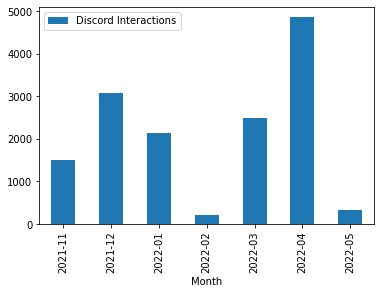

In [47]:
# plot data
df1.plot(x = 'Month', y = 'Discord Interactions',kind = 'bar')

In [49]:
# plot data by member
# df.plot(x = 'Author', y = 'Content',kind = 'bar')
df

,Content
Author,
lucaspon#3865,870
matthewbrooks.eth#5293,724
brileigh.eth#2805,680
Lapsus#4632,338
claudia#0273,259
JoseCactuss#2668,211
munzmeister#1952,158
quimp#3833,148
T2#4068,122
